In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [4]:
toyota=pd.read_csv('ToyotaCorolla.csv')
toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [5]:
toyota.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
## renaming columns
toyota=toyota.rename({'Age_08_04':'Age'},axis=1)
toyota

,Id,Model,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


{'whiskers': [<matplotlib.lines.Line2D at 0x212a16f2220>,
 'caps': [<matplotlib.lines.Line2D at 0x212a16f28e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x212a16e6e80>],
 'medians': [<matplotlib.lines.Line2D at 0x212a16f2fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x212a16fc340>],
 'means': []}

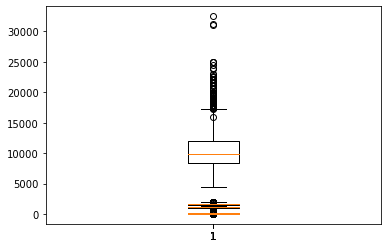

In [34]:
plt.boxplot(toyota["Price"])


{'whiskers': [<matplotlib.lines.Line2D at 0x212a27f9100>,
 'caps': [<matplotlib.lines.Line2D at 0x212a27f97c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x212a27e9d60>],
 'medians': [<matplotlib.lines.Line2D at 0x212a27f9e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x212a2802220>],
 'means': []}

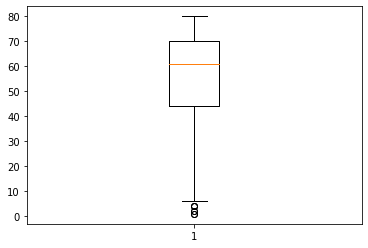

In [37]:
plt.boxplot(toyota["Age"])


{'whiskers': [<matplotlib.lines.Line2D at 0x212a1792520>,
 'caps': [<matplotlib.lines.Line2D at 0x212a1797ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x212a1786fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x212a27b1fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x212a27ba3d0>],
 'means': []}

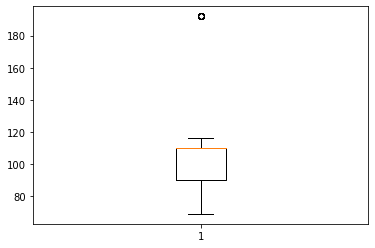

In [38]:
plt.boxplot(toyota["HP"])


{'whiskers': [<matplotlib.lines.Line2D at 0x212a12f1dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x212a12f1a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x212a12f1f40>],
 'medians': [<matplotlib.lines.Line2D at 0x212a15f6cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x212a12ea670>],
 'means': []}

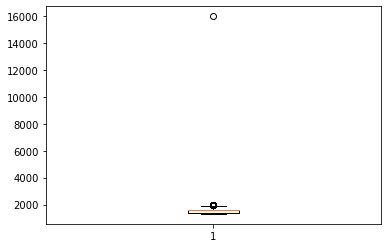

In [39]:
plt.boxplot(toyota["cc"])


{'whiskers': [<matplotlib.lines.Line2D at 0x212a28a98e0>,
 'caps': [<matplotlib.lines.Line2D at 0x212a28a9fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x212a28a9580>],
 'medians': [<matplotlib.lines.Line2D at 0x212a28b66a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x212a28b6a00>],
 'means': []}

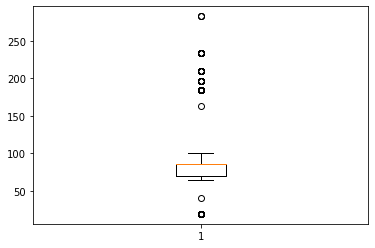

In [40]:
plt.boxplot(toyota["Quarterly_Tax"])


{'whiskers': [<matplotlib.lines.Line2D at 0x212a27943d0>,
 'caps': [<matplotlib.lines.Line2D at 0x212a2794a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x212a2794070>],
 'medians': [<matplotlib.lines.Line2D at 0x212a27a1190>],
 'fliers': [<matplotlib.lines.Line2D at 0x212a27a14f0>],
 'means': []}

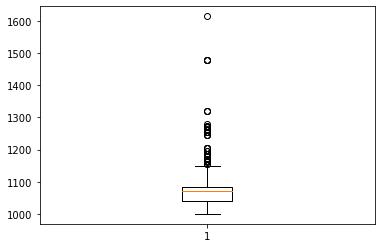

In [36]:
plt.boxplot(toyota["Weight"])

All the data is not normally distributed. Price, Age, KM, HP, Quarterly_Tax and Weight have outliers. 

In [9]:
toyota.corr()

,Id,Price,Age,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.079713,0.066265,-0.117704,...,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725


In [11]:
## Model 1

import statsmodels.formula.api as smf
model= smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data= toyota).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 03 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:08:55   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age            -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# calculating VIF's values of independent variables
rsq_Age = smf.ols('Age ~ KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=toyota).fit().rsquared  
vif_Age = 1/(1-rsq_Age) 
vif_Age

1.8846198056602868

In [14]:
rsq_KM = smf.ols('KM ~ Age+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=toyota).fit().rsquared  
vif_KM = 1/(1-rsq_KM) 
vif_KM

1.7569047782042881

In [15]:
rsq_HP = smf.ols('HP ~ Age+KM+cc+Doors+Gears+Quarterly_Tax+Weight', data=toyota).fit().rsquared  
vif_HP = 1/(1-rsq_HP) 
vif_HP

1.4194221086310974

In [16]:
rsq_cc = smf.ols('cc ~ Age+KM+HP+Doors+Gears+Quarterly_Tax+Weight', data=toyota).fit().rsquared  
vif_cc = 1/(1-rsq_cc) 
vif_cc

1.1638939849423797

In [17]:
rsq_Doors = smf.ols('Doors ~ Age+KM+HP+cc+Gears+Quarterly_Tax+Weight', data=toyota).fit().rsquared  
vif_Doors = 1/(1-rsq_Doors) 
vif_Doors

1.156575207076043

In [18]:
rsq_Gears = smf.ols('Gears ~ Age+KM+HP+cc+Doors+Quarterly_Tax+Weight', data=toyota).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears) 
vif_Gears

1.098723019347037

In [19]:
rsq_Quarterly_Tax = smf.ols('Quarterly_Tax ~ Age+KM+HP+cc+Doors+Gears+Weight', data=toyota).fit().rsquared  
vif_Quarterly_Tax = 1/(1-rsq_Quarterly_Tax) 
vif_Quarterly_Tax

2.311430811531038

In [20]:
rsq_Weight = smf.ols('Weight ~ Age+KM+HP+cc+Doors+Gears+Quarterly_Tax', data=toyota).fit().rsquared
vif_Weight = 1/(1-rsq_Weight) 
vif_Weight

2.516419837445868

In [27]:
Toyota1 = {'Variables':['Age','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif_Age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_Quarterly_Tax,vif_Weight]}
Vif_frame = pd.DataFrame(Toyota1)  
Vif_frame

,Variables,VIF
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


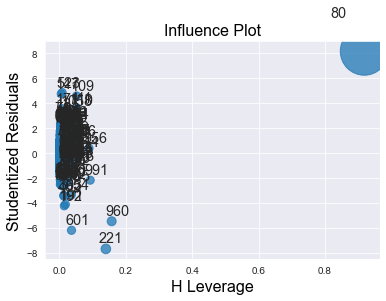

In [29]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model)
plt.show()

In [31]:
## Checking influence
toyota[toyota.index.isin([80,601,960,221])]

,Id,Model,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
80,81,TOYOTA Corolla 1.6 5drs 1 4/5-Doors,18950,25,8,2002,20019,Petrol,110,1,...,1,1,1,0,0,0,0,0,0,0
221,223,TOYOTA Corolla 1.6 HB LINEA SOL 4/5-Doors,12450,44,1,2001,74172,Petrol,110,1,...,1,1,1,0,0,0,1,0,0,0
601,605,TOYOTA Corolla 2.0 d HB Diesel 2/3-Doors,7500,50,7,2000,1,Diesel,90,1,...,1,1,1,1,0,0,0,1,1,1
960,964,TOYOTA Corolla,9390,66,3,1999,50806,Petrol,86,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
toyota2=toyota.drop(toyota.index[[80,601,960,221]],axis=0).reset_index(drop=True)
toyota2

,Id,Model,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1428,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1429,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1430,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


We will ommit Gears it has lowest VIF numbers, suggesting low correlation among variables

In [40]:
## Final model
finalmodel= smf.ols("Price~Age+KM+HP+cc+Doors+Quarterly_Tax+Weight",data= toyota2).fit()
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1627.
Date:                Tue, 03 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:37:21   Log-Likelihood:                -12194.
No. Observations:                1432   AIC:                         2.440e+04
Df Residuals:                    1424   BIC:                         2.445e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.401e+04   1157.710    -12.099      0.000   -1.63e+04   -1.17e+04
Age            -110.3864      2.449    -45.080      0.000    -115.190    -105.583
KM               -0.0174      0.001    -14.774      0.000      -0.020      -0.015
HP               36.0089      2.639     13.643      0.000      30.831      41.186
cc               -3.7282      0.297    -12.548      0.000      -4.311      -3.145
Doors          -162.7541     36.285     -4.485      0.000    -233.933     -91.576
Quarterly_Tax     3.8690      1.363      2.839      0.005       1.196       6.542
Weight           32.3014      1.286     25.127      0.000      29.780      34.823
==============================================================================
Omnibus:                       75.443   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.762
Skew:                           0.102   Prob(JB):                     1.44e-57
Kurtosis:                       5.085   Cond. No.                     2.83e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
### Splitting the data into train and test data 
from sklearn.model_selection import train_test_split
toyota_train, toyota_test  = train_test_split(toyota2, test_size = 0.2) # 20% test data

In [42]:
# preparing the model on train data 
model_train = smf.ols("Price~Age+KM+HP+cc+Doors+Quarterly_Tax+Weight",data= toyota2).fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1627.
Date:                Tue, 03 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:39:47   Log-Likelihood:                -12194.
No. Observations:                1432   AIC:                         2.440e+04
Df Residuals:                    1424   BIC:                         2.445e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.401e+04   1157.710    -12.099      0.000   -1.63e+04   -1.17e+04
Age            -110.3864      2.449    -45.080      0.000    -115.190    -105.583
KM               -0.0174      0.001    -14.774      0.000      -0.020      -0.015
HP               36.0089      2.639     13.643      0.000      30.831      41.186
cc               -3.7282      0.297    -12.548      0.000      -4.311      -3.145
Doors          -162.7541     36.285     -4.485      0.000    -233.933     -91.576
Quarterly_Tax     3.8690      1.363      2.839      0.005       1.196       6.542
Weight           32.3014      1.286     25.127      0.000      29.780      34.823
==============================================================================
Omnibus:                       75.443   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.762
Skew:                           0.102   Prob(JB):                     1.44e-57
Kurtosis:                       5.085   Cond. No.                     2.83e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
# train_data prediction
train_pred = model_train.predict(toyota_train)
train_pred

393     11004.034892
636      7348.630562
172     18578.628135
1353     8248.950980
1018    10160.245545
            ...     
689      9796.441140
676      9618.373773
266     15430.661408
839     10342.091017
891      9880.425950
Length: 1145, dtype: float64

In [47]:
# train residual values 
train_resid  = train_pred - toyota_train.Price
train_resid

393     2004.034892
636    -2601.369438
172     -371.371865
1353     348.950980
1018    -739.754455
           ...     
689     -153.558860
676     -331.626227
266      680.661408
839     -157.908983
891    -1114.574050
Length: 1145, dtype: float64

In [48]:
# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid * train_resid))
train_rmse

1206.2395734056934

In [49]:
# prediction on test data set 
test_pred = model_train.predict(toyota_test)
test_pred

702      9580.215918
433     10986.697654
309     12862.130449
1405     9025.485093
579     10863.540174
            ...     
406     10723.449533
1019     9933.752475
1194     6968.807419
165     18363.943215
83      16607.704849
Length: 287, dtype: float64

In [51]:
# test residual values 
test_resid  = test_pred - toyota_test.Price
test_resid

702     -319.784082
433       91.697654
309    -1132.869551
1405    1125.485093
579      363.540174
           ...     
406      773.449533
1019    -516.247525
1194    -481.192581
165    -1586.056785
83       -42.295151
Length: 287, dtype: float64

In [52]:
# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid*test_resid)) 
test_rmse

1213.262462365218

We improved the model, Adjusted R^2=0.863 to finalmodel, Adjusted R^2=0.888. We do this by removing 'Gears' that have the lowest VIF & removing the outliers & influencers identified in rows 80,221,601,960.

Hence, our model is predicting the price of Toyota Corolla with 88.9% accuracy.
with train RMSE = 1206.24
with test RMSE = 1213.26